<a href="https://colab.research.google.com/github/Noahbisht0/Tensorflow2-keras/blob/main/Tensorflow2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-16 08:31:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   128MB/s    in 1.1s    

2021-01-16 08:31:26 (128 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os 
import zipfile 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse48-2.png', 'horse10-6.png', 'horse13-2.png', 'horse22-6.png', 'horse31-0.png', 'horse13-6.png', 'horse16-6.png', 'horse50-2.png', 'horse37-6.png', 'horse36-0.png']
['human01-02.png', 'human01-10.png', 'human05-05.png', 'human01-22.png', 'human04-22.png', 'human02-01.png', 'human17-16.png', 'human02-02.png', 'human13-08.png', 'human17-23.png']


In [ ]:
print("total training horse images: ",len(train_horse_names))
print("total traiing human images: ",len(train_human_names))

total training horse images:  500
total traiing human images:  527


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0


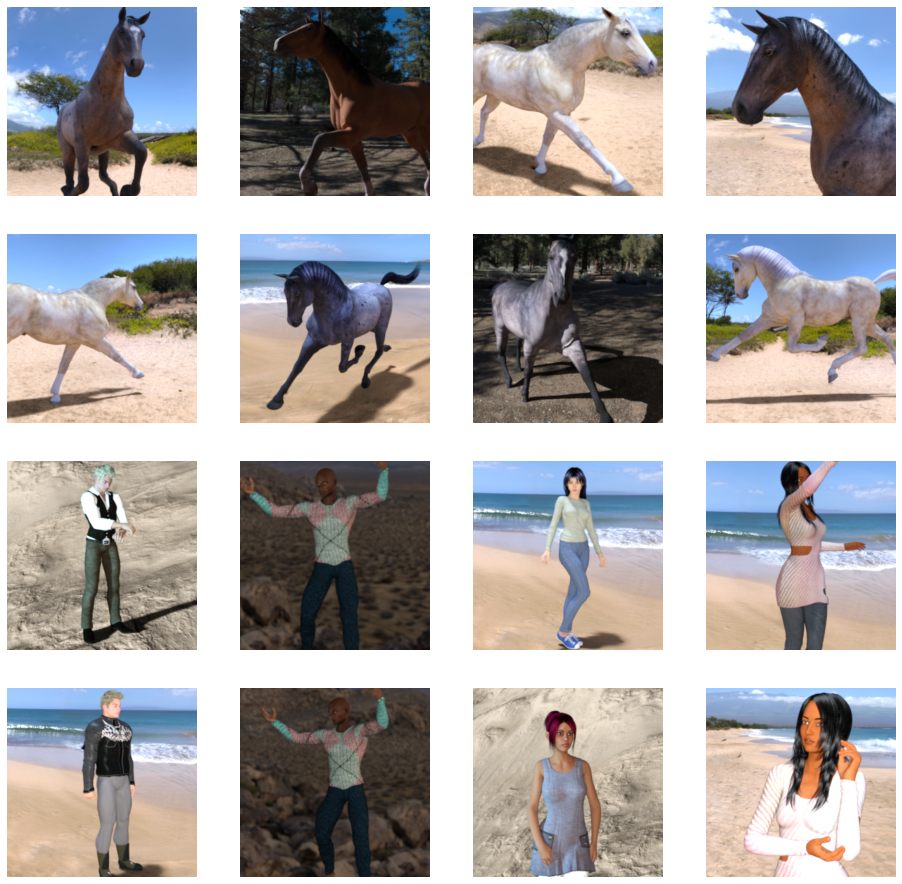

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]
for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()  

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape = (300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation="relu"),
                                    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy',optimizer = RMSprop(learning_rate=0.001),metrics=['accuracy']) 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size = 128,class_mode = 'binary')


Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)


Epoch 1/15
8/8 [==============================] - 70s 8s/step - loss: 0.7614 - accuracy: 0.5497
Epoch 2/15
8/8 [==============================] - 67s 8s/step - loss: 0.8468 - accuracy: 0.6374
Epoch 3/15
8/8 [==============================] - 76s 9s/step - loss: 0.5150 - accuracy: 0.8639
Epoch 4/15
8/8 [==============================] - 68s 8s/step - loss: 0.2612 - accuracy: 0.9205
Epoch 5/15
8/8 [==============================] - 68s 8s/step - loss: 0.1825 - accuracy: 0.9347
Epoch 6/15
8/8 [==============================] - 68s 8s/step - loss: 0.2504 - accuracy: 0.9084
Epoch 7/15
8/8 [==============================] - 68s 8s/step - loss: 0.1432 - accuracy: 0.9358
Epoch 8/15
8/8 [==============================] - 68s 8s/step - loss: 0.1401 - accuracy: 0.9481
Epoch 9/15
8/8 [==============================] - 68s 8s/step - loss: 0.1131 - accuracy: 0.9657
Epoch 10/15
8/8 [==============================] - 68s 8s/step - loss: 0.1424 - accuracy: 0.9706
Epoch 11/15
8/8 [======================

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


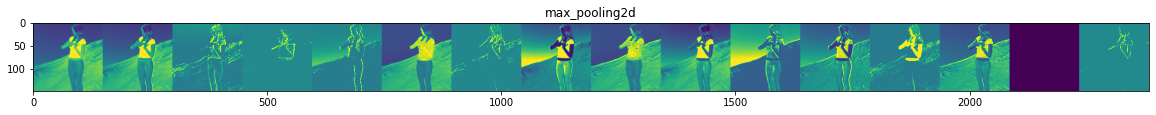

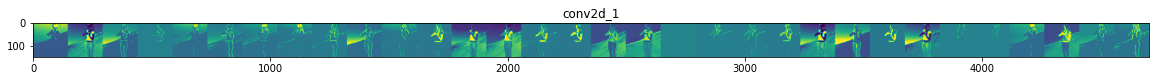

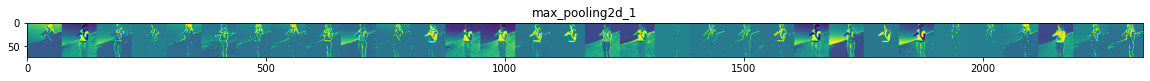

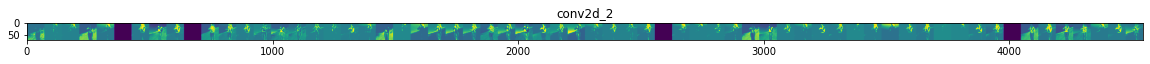

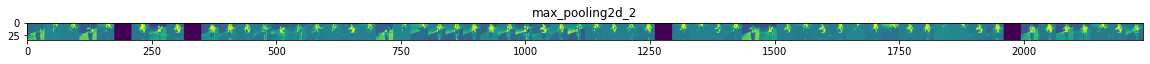

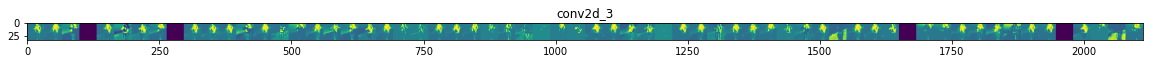

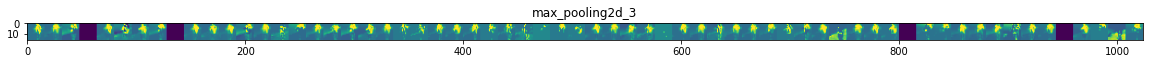

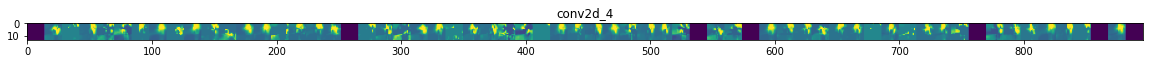

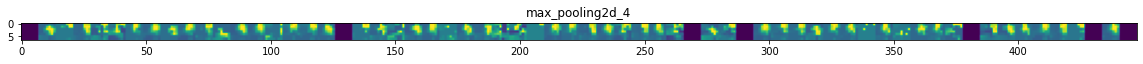

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape) 
x /= 255

successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers[1:]]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

